<a href="https://colab.research.google.com/github/raafitt/GoogleColab/blob/TextClassifier/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2225_4_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя публичный датасет по обращениям граждан в администрацию, техническую поддержку или за консультацией, обучена модель классифицировать обращения по тематикам. Сформированы отчет о классификации и матрица ошибок.

In [ ]:
from sklearn.utils import resample
from google.colab import files
files.upload()

Saving test_data.csv to test_data (1).csv
Saving train_data.csv to train_data (1).csv


{'test_data (1).csv': b"utterance|request|importance\r\ni bought a product, could I modify my fucking purchase?|change_order|high_priority\r\nask an agent where to notify fucking problems paying, please|payment_issue|medium_priority\r\ncould u ask an agent how to notify a fucking issue making a payment, please?|payment_issue|high_priority\r\nthe event was cancelled and i want to obtain a fucking reimbursement, please|get_refund|standard_priority\r\nplease, could u show me the fucking phone number of client service?|contact_customer_service|high_priority\r\ncan you tell me how to track my fucking sdhipment?|track_order|medium_priority\r\nplease, ask an agent to inform of a fucking issue with my payment|payment_issue|medium_priority\r\nplease, ask an agent where i could inform of fucking problems making a payment|payment_issue|high_priority\r\nI want a fuckimg user account and I'd like to open one|create_account|standard_priority\r\ni need a fucking reimbursement, can i request one, plea

In [ ]:
import pandas as pd
train_ds=pd.read_csv('/content/train_data.csv',sep='|')
test_ds=pd.read_csv('/content/test_data.csv',sep='|')

In [ ]:
train_ds.drop(columns=['importance'],inplace=True)
test_ds.drop(columns=['importance'],inplace=True)

In [ ]:
train_ds.request.value_counts()

,count
request,
payment_issue,4209
create_account,2186
contact_customer_service,2116
get_invoice,1578
track_order,1370
get_refund,1307
contact_human_agent,1187
recover_password,1165
change_order,1108


In [ ]:
test_ds.request.value_counts()

,count
request,
payment_issue,196
contact_customer_service,94
create_account,90
get_invoice,61
track_order,55
get_refund,51
recover_password,45
change_order,43
check_invoices,43


Обобщение всех классов в 4 класса, и балансировка датасетов

In [ ]:
labels_dict={'payment_and_refunds':['payment_issue','get_refund','check_refund_policy','track_refund','check_payment_methods'],
             'account_and_datamanagement':['create_account', 'recover_password', 'delete_account', 'switch_account', 'edit_account', 'registration_problems', ],
             'orders_and_delivery':['track_order', 'change_order', 'delivery_options','delivery_period', 'change_shipping_address','set_up_shipping_address','place_order', 'cancel_order',],
             'support_and_feedback':['contact_customer_service','contact_human_agent','get_invoice','check_invoices','check_invoice','complaint','review','check_cancellation_fee','newsletter_subscription',]}

In [ ]:
def generalize(value):
  for label in labels_dict:
    if value in labels_dict[label]:
      value=label
  return value

In [ ]:
train_ds=train_ds.applymap(generalize)
test_ds=test_ds.applymap(generalize)

<ipython-input-10-d077c7874505>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_ds=train_ds.applymap(generalize)
<ipython-input-10-d077c7874505>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_ds=test_ds.applymap(generalize)


In [ ]:
def df_balancing(df,labels):
  dataframes=[]
  for label in labels:
    dataframes.append(df[df['request']==label])


  min_class_size=df['request'].value_counts().min()
  balansed_dataframes=[]
  for dataframe in dataframes:
    balansed_dataframes.append(resample(dataframe,
                                  replace=False,    # без замены
                                  n_samples=min_class_size,  # до размера меньшего класса
                                  random_state=42))  # для воспроизводимости
  return pd.concat(balansed_dataframes)

In [ ]:
train_ds=df_balancing(train_ds,labels_dict)
test_ds=df_balancing(test_ds,labels_dict)

In [ ]:
train_ds['request'].value_counts()

,count
request,
payment_and_refunds,4845
account_and_datamanagement,4845
orders_and_delivery,4845
support_and_feedback,4845


In [ ]:
test_ds['request'].value_counts()

,count
request,
payment_and_refunds,131
account_and_datamanagement,131
orders_and_delivery,131
support_and_feedback,131


In [ ]:
!pip install autokeras==1.1.0 tensorflow==2.15.1 keras-nlp==0.5.1

INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.1/527.1 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta

In [ ]:
# Библиотека матричного вычисления
import numpy as np
# Библиотека для работы с данными
import pandas as pd
# Библиотека для работы с регулярными выражениями
import re
# Библиотека для работы с фреймворком TensorFlow
import tensorflow as tf
# Библиотека AutoML autokeras
import autokeras as ak
# Библиотеки для построения графиков и их стилизации
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Утилита для расщепления выборки
from sklearn.model_selection import train_test_split

# Необходимые метрики для построения Матрицы ошибок и отчета о классификации
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(np.array(train_ds['utterance']),
                                             np.array(train_ds['request']),
                                               test_size=0.2)
x_test=np.array(test_ds['utterance'])
y_test=np.array(test_ds['request'])

In [ ]:
print('Форма входных данных: ', x_train.shape)
print('Форма выходных меток: ', y_train.shape)
print('Пример заголовка: ', x_train[0])

Форма входных данных:  (15504,)
Форма выходных меток:  (15504,)
Пример заголовка:  how can I delete my user account?


In [ ]:
del train_ds,test_ds

In [ ]:
# Создание ансамбля моделей (3 наиболее подходящие к данным моделей)
clf = ak.TextClassifier(overwrite=True, max_trials=2, objective='val_accuracy')

# Обучаем 2 модели на 4-х эпохах, размер пакета подбирается автоматически
result_training = clf.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Trial 2 Complete [00h 00m 49s]
val_accuracy: 0.9963880181312561

Best val_accuracy So Far: 0.9976780414581299
Total elapsed time: 00h 01m 26s
Epoch 1/5
485/485 [==============================] - 10s 18ms/step - loss: 0.1953 - accuracy: 0.9290 - val_loss: 0.0107 - val_accuracy: 0.9964
Epoch 2/5
485/485 [==============================] - 4s 8ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0117 - val_accuracy: 0.9966
Epoch 3/5
485/485 [==============================] - 4s 9ms/step - loss: 4.4856e-04 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9961
Epoch 4/5
485/485 [==============================] - 4s 8ms/step - loss: 2.0219e-04 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 5/5
485/485 [==============================] - 4s 8ms/step - loss: 8.0313e-05 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 0.9969


In [ ]:
def plot_graphs(history, key):
    # Используем библиотеку seaborn для задания стиля и цветовой схемы графика
    sns.set_style('darkgrid')
    palette = sns.color_palette('Set1')

    # Задаем размер полотна для рисования графика
    plt.figure(figsize=(12,6))

    # Отображаем график выбранного параметра
    plt.plot(history.history[key],   # данные для построения графика
             marker='o',             # использовать маркер для точек на графике
             color=palette[2],       # использовать цвет третий в палитре (нумерация с 0)
             linewidth=2.5,          # ширина линии
             label=key)              # подпись легенды

    # График для проверочной выборки
    if 'val_'+key in history.history:
        plt.plot(history.history['val_'+key], # данные для построения графика
                 marker='o',                  # использовать маркер для точек на графике
                 color=palette[4],            # использовать цвет пятый в палитре
                 linewidth=2.5,               # ширина линии
                 label='val_'+key)            # подпись легенды

    # подпись оси Х, размер шрифта - 12
    plt.xlabel("Эпоха", fontsize=12)
    # подпись оси Y, размер шрифта - 12
    plt.ylabel(key, fontsize=12)

    # подпись заголовка графика, размер шрифта - 14
    plt.title('Обучающая и проверочная выборки ('+key.title()+')', fontsize=14)

    # отображение легенды, размер шрифта - 12
    plt.legend(fontsize=12)

    # задаем сетку на графике
    plt.grid(True)

    # отрисовываем полотно со всеми графиками
    plt.show()




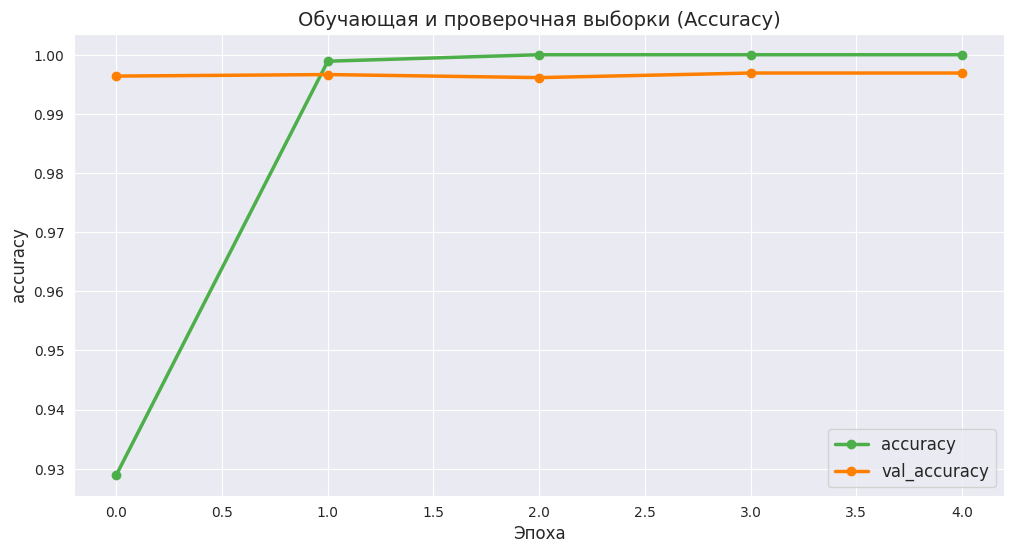

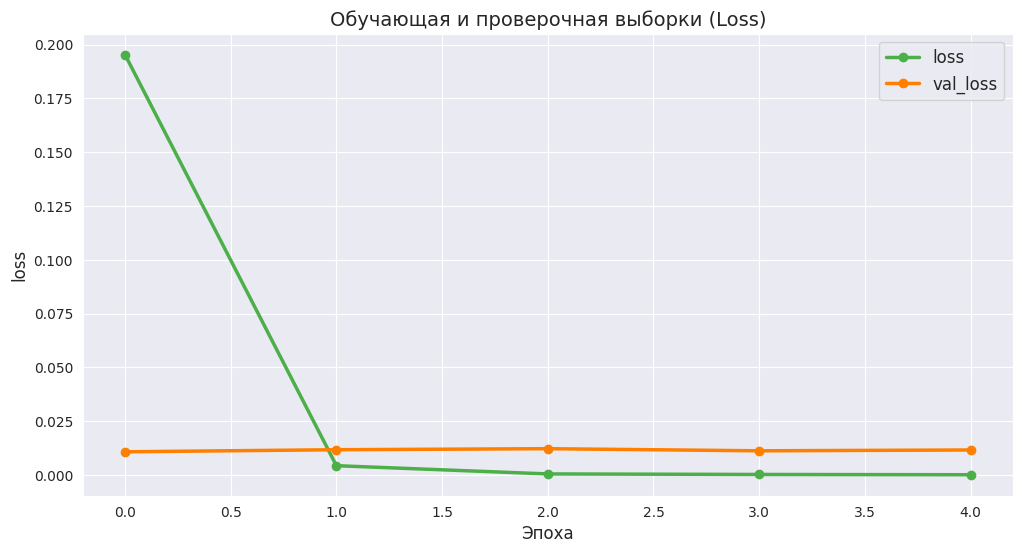

In [ ]:
# строим график точности
plot_graphs(result_training, "accuracy")

# строим график потерь
plot_graphs(result_training, "loss")

In [ ]:
# Предсказание на лучшей модели
predicted_y = clf.predict(x_test)

# Оценка лучшей модели на тестовых данных
print(clf.evaluate(x_test, y_test))

17/17 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 0.9981
[0.0021662397775799036, 0.9980915784835815]


In [ ]:
print(classification_report(y_test, predicted_y))

                            precision    recall  f1-score   support

account_and_datamanagement       1.00      1.00      1.00       131
       orders_and_delivery       0.99      1.00      1.00       131
       payment_and_refunds       1.00      1.00      1.00       131
      support_and_feedback       1.00      0.99      1.00       131

                  accuracy                           1.00       524
                 macro avg       1.00      1.00      1.00       524
              weighted avg       1.00      1.00      1.00       524



In [ ]:
confusion_matrix(y_test, np.reshape(predicted_y,(y_test.shape[0],)))

array([[131,   0,   0,   0],
       [  0, 131,   0,   0],
       [  0,   0, 131,   0],
       [  0,   1,   0, 130]])

In [ ]:
labels=set(y_test)
cmatrix = confusion_matrix(y_test, np.array(predicted_y),normalize='true')

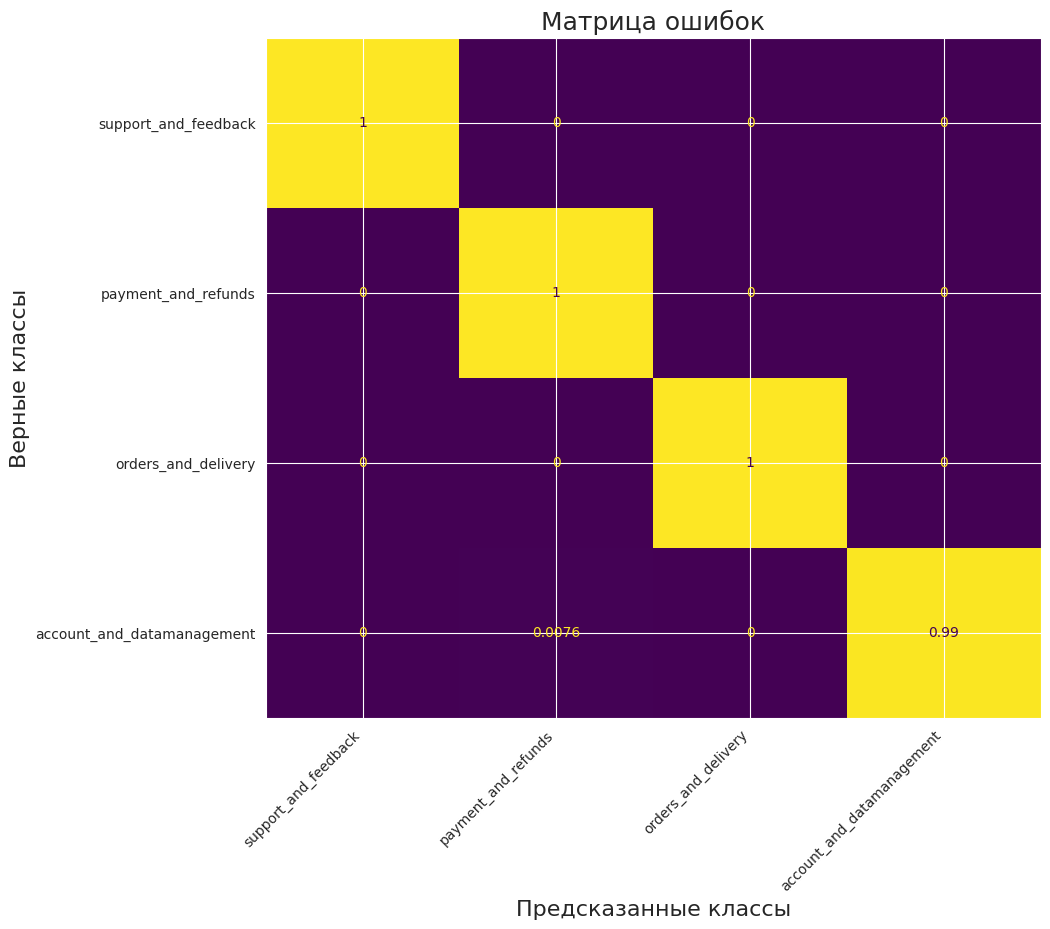

In [ ]:
# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=labels)
disp.plot(ax=ax)
plt.gca().images[-1].colorbar.remove()  # Убираем ненужную цветовую шкалу
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси
# Увеличение масштаба матрицы
ax = plt.gca()
ax.set_aspect('auto')  # Увеличение масштаба матрицы
plt.show()

In [ ]:
# Определим функцию предсказания темы
def predict_subject(text, model):
    # Предсказание
    return  model.predict(np.array([text]))


text = "Help me restore my instagram profile"

# Выполняем функции
predict_subject(text, clf)


1/1 [==============================] - 0s 6ms/step


array([['account_and_datamanagement']], dtype='<U26')